In [1]:
import pandas as pd
import numpy as np
import math

import matplotlib.pyplot as plt

from pymatreader import read_mat

In [2]:
GA1 = read_mat('GA1_small.mat')
GA2 = read_mat('GA2_small.mat')
GA3 = read_mat('GA3_small.mat')
EA = read_mat('EA_small.mat')
H2O = read_mat('H2O_small.mat')

/Users/kiristern/miniforge3/envs/tensorflow/lib/python3.9/site-packages/scipy/io/matlab/mio.py:226: MatReadWarning: Duplicate variable name "None" in stream - replacing previous with new
Consider mio5.varmats_from_mat to split file into single variable files
  matfile_dict = MR.get_variables(variable_names)
/Users/kiristern/miniforge3/envs/tensorflow/lib/python3.9/site-packages/pymatreader/utils.py:224: UserWarning: pymatreader cannot import Matlab string variables. Please convert these variables to char arrays in Matlab.
  warn('pymatreader cannot import Matlab string variables. '


In [3]:
jaabG1 = GA1['dat_JAABA']
jbG1 = GA1['dat_JB']
jaabG2 = GA2['dat_JAABA']
jbG2 = GA2['dat_JB']
jaabG3 = GA3['dat_JAABA']
jbG3 = GA3['dat_JB']
jaabEA = EA['dat_JAABA']
jbEA = EA['dat_JB']
jaabH2O = H2O['dat_JAABA']
jbH2O = H2O['dat_JB']

In [4]:
for key in jbG1:
    print(key)

xspine
yspine
AN
et
x
y
heading_direction


In [ ]:
for key in jaabG1:
    print(key)

In [ ]:
jbG1['x'][0].shape

In [ ]:
# add 0 to the end of each array to keep the same dims when subtracting (next step)
def add_zero(arr):
    for i in range(len(arr['x'])):
        arr['x'][i] = np.pad(arr['x'][i], (0,1))
        arr['y'][i] = np.pad(arr['y'][i], (0,1))
#         arr['x'][i] = np.concatenate([arr['x'], np.zeros(1)])
#         arr['y'][i] = np.concatenate([arr['y'], np.zeros(1)])

In [ ]:
# add_zero(jbG1)
# # for some reason it applies it to all the other conditions
# # add_zero(jbG2)
# # add_zero(jbG3)
# # add_zero(jbEA)
# # add_zero(jbH2O)

In [ ]:
print(jbG2['x'][0].shape)

In [ ]:
def get_dist(dictionary):
    dx = []
    dy = []
    dist = []
    for i in dictionary['x']:
        dx.append(np.diff(i)) # get difference between subsequent x values
    for i in dictionary['y']:
        dy.append(np.diff(i)) # get different between subsequent y values
    for i in range(len(dx)):
        dist.append((dx[i]**2 + dy[i]**2)**0.5) # get distance between points
    
    # upload new 'distance' key to dictionary    
    dictionary['distance'] = []
    return dictionary.update({'distance': dist})

In [ ]:
# get_dist(jbG1)
# get_dist(jbG2)
# get_dist(jbG3)
# get_dist(jbEA)
# get_dist(jbH2O)

In [ ]:
# print(jbG2['x'][0].shape, jbG2['y'][0].shape, jbG2['distance'][0].shape)

In [ ]:
jbG3['heading_direction'][0].shape

In [ ]:
for key in jbG1:
    print(key)

In [ ]:
# replace all nan to 0
def nan2zero(arr):
    for i in range(len(arr['distance'])):
        arr['distance'][i][np.isnan(arr['distance'][i])] = 0

In [ ]:
# nan2zero(jbG1)
# nan2zero(jbG2)
# nan2zero(jbG3)
# nan2zero(jbEA)
# nan2zero(jbH2O)

In [ ]:
# jbG1['distance']

In [ ]:
# get inputs for model
def get_inputs(arr):
    input_x = []
    input_y = []
    for i in range(len(arr['distance'])):
        input_x.append(arr['distance'][i] * np.cos(arr['heading_direction'][i]))
        input_y.append(arr['distance'][i] * np.sin(arr['heading_direction'][i]))
        
    # upload new input keys to dictionary    
    arr['in_x'] = []
    arr['in_y'] = []
    arr.update({'in_x': input_x })
    arr.update({'in_y': input_y})

In [ ]:
# get_inputs(jbG1)
# # for some reason it applies it to all the other conditions
# # get_inputs(jbG2)
# # get_inputs(jbG3)
# # get_inputs(jbEA)
# # get_inputs(jbH2O)

In [ ]:
for key in jbG2:
    print(key)

In [ ]:
for i, j in enumerate(jbG2['AN']):
    print(i, j)

In [ ]:
# def make_data(dic):
#     inX=[]
#     inY=[]
#     theta=[]
#     data=[]
#     for i, j in enumerate(dic['in_x']):
#         # reshape arrays to list of vectors with 1 element in order to hcat 
#         inX.append(dic['in_x'][i].reshape((len(j),1))) 
#         inY.append(dic['in_y'][i].reshape((len(j),1)))
#         theta.append(dic['heading_direction'][i].reshape((len(j),1)))
        
#         # horizontally concatenate
#         data.append(np.hstack((inX[i], inY[i], theta[i])))
#     return data

In [5]:
#### without the transformation ####
def make_data(dic):
    inX=[]
    inY=[]
    theta=[]
    data=[]
    for i, j in enumerate(dic['x']):
        # reshape arrays to list of vectors with 1 element in order to hcat 
        inX.append(dic['x'][i].reshape((len(j),1))) 
        inY.append(dic['y'][i].reshape((len(j),1)))
        theta.append(dic['heading_direction'][i].reshape((len(j),1)))
        
        # horizontally concatenate
        data.append(np.hstack((inX[i], inY[i], theta[i])))
    return data

In [6]:
G1_dat = make_data(jbG1)
G2_dat = make_data(jbG2)
G3_dat = make_data(jbG3)
EA_dat = make_data(jbEA)
H2O_dat = make_data(jbH2O)

In [ ]:
#G1_dat[0]

In [ ]:
G2_dat[988].shape

In [ ]:
len(np.vstack((G1_dat[9], G1_dat[23], G1_dat[63])))

In [22]:
# data = np.vstack(np.vstack((G1_dat[87], G1_dat[9], G1_dat[23], G1_dat[63])))
# data = np.vstack(np.vstack((G2_dat[527], G2_dat[465])))
# data = np.vstack((condit[581], condit[988]))
data = np.vstack((condit[2], condit[133], condit[170]))

In [23]:
len(data)

9408

In [8]:
condit = EA_dat
data = condit

In [ ]:
# x_orig = []
# y_orig = []
# for i in range(len(data)):
#     x_orig = [data[i][j][0] for j in range(len(data[i]))]
#     y_orig = [data[i][j][1] for j in range(len(data[i]))]

In [ ]:
# fig, axis = plt.subplots(len(data), 1)
# for i in range(len(data)):
#     axis[i].plot(x_orig[i], y_orig[i])

In [ ]:
# #### show bug trajectory before transformation ####
# idx = 0
# BugID = jbG1['AN'][idx]

# plt.figure(figsize=(7,7))
# plt.plot(jbG1['x'][idx][:-1], jbG1['y'][idx][:-1], marker=',', label=None, linewidth=1)
# plt.title('BugID:{}'.format(BugID))
# plt.axvline(x=0, color='red', linestyle='--')
# plt.scatter(jbG1['x'][idx][-2], jbG1['y'][idx][-2], c="red")
# plt.scatter(jbG1['x'][idx][0], jbG1['y'][idx][0], c="green")

# plt.show()

In [11]:
# print idx of bugs that have more than X and less than Y time step data points
for i in range(len(condit)):
    #if (len(G1_dat[i]) > 2000) and (len(G1_dat[i]) < 3000):
    if len(condit[i]) > 3000:
        print(i)

2
22
62
70
133
143
170
465
876


3083


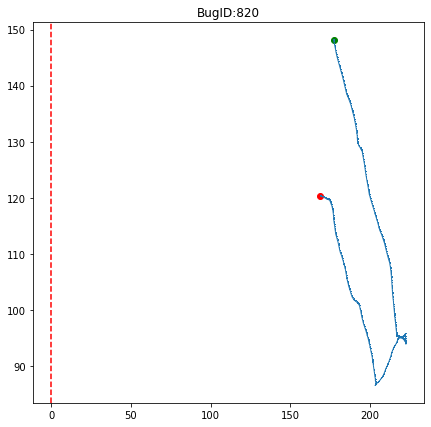

In [19]:
idx = 170
data = condit[idx]
cond = jbG3
print(len(data))
BugID = cond['AN'][idx]
x_orig = []
y_orig = []
for i in range(len(data)):
    x_orig.append(data[i][0])
    y_orig.append(data[i][1])
    
plt.figure(figsize=(7,7))
plt.plot(cond['x'][idx][:-1], cond['y'][idx][:-1], marker=',', label=None, linewidth=1)
plt.title('BugID:{}'.format(BugID))
plt.axvline(x=0, color='red', linestyle='--')
plt.scatter(cond['x'][idx][-2], cond['y'][idx][-2], c="red")
plt.scatter(cond['x'][idx][0], cond['y'][idx][0], c="green")


In [24]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import math
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
import random
from sklearn.metrics import mean_squared_error as mse
from math import sqrt
from tensorflow.keras.utils  import plot_model
from sklearn.ensemble import RandomForestRegressor
from tensorflow.keras.layers import Dense, Lambda, dot, Activation, concatenate
from tensorflow.keras.layers import Layer

In [25]:
# load_address = '/Volumes/LaCie/school/QLS/trajectory_demo/data/'


In [26]:
traject = []#Create empty list of tracks
n_in_h = 50
n_out_h = 1000
for k in range(0, len(data) - (n_in_h + n_out_h), (n_in_h + n_out_h)):
    a = []
    for j in range(k, k + (n_in_h + n_out_h)):#Loop from the kth position to k+8
        b = []#Create empty list
        if j == k:#If the first
            for i in range(3):#Add x and y to b
                b.append(data[k][i])
        else:#If not the first
            for i in range(3):#Add x and y to b
                b.append(data[j][i])
        a.append(b)#Put each b into a
    traject.append(a)#Put a in the empty list of trajectories
#len_in = (len(traject) * 80) // 100 #Use 4/5 as the training set
len_in = (len(traject) * 60 // 100)
train = traject[:len_in]
test = traject[len_in:]


In [27]:
len(traject)

8

In [28]:
traject

[[[58.146, 104.24, -6.4604720708905505],
  [58.087, 104.206, -10.494198083401699],
  [57.667, 104.174, -8.607742701086737],
  [57.69, 104.11, -6.314096812457216],
  [57.399, 104.046, -6.204082118487157],
  [57.462, 104.036, -3.063685280571215],
  [57.364, 104.079, -4.252966387002499],
  [57.396, 104.108, -4.744699546332737],
  [57.06, 104.054, -4.070277001200014],
  [56.824, 103.997, -2.940864809762397],
  [56.694, 103.941, -3.3496972632474535],
  [56.569, 103.89, -0.5982932058840846],
  [56.363, 103.887, -1.700060575028088],
  [56.476, 103.971, -5.2767534062531665],
  [56.146, 103.911, -3.1058163153054767],
  [55.984, 103.872, -4.4178294462454675],
  [55.922, 103.864, -8.90514928210218],
  [55.606, 103.836, -14.56724264565632],
  [55.51, 103.782, -13.485084101595117],
  [55.459, 103.74, -15.362945637102422],
  [55.279, 103.784, -19.931726196901728],
  [55.379, 103.785, -23.912092255444584],
  [55.248, 103.775, -28.887284618755324],
  [54.933, 103.644, -37.87695508486241],
  [54.886, 1

In [29]:
len(train)

4

In [30]:
x_train = []
y_train = []
for i in range(0, len(train)):
    temp = []
    for k in range(n_in_h):
        temp.append(train[i][k])
    x_train.append(temp)

for i in range(0, len(train)):
    temp = []
    for k in range(n_in_h, n_in_h + n_out_h):#（7.8）
        temp.append(train[i][k])
    y_train.append(temp)

x_test = []
y_test = []
for i in range(0, len(test)):
    temp = []
    for k in range(n_in_h):
        temp.append(test[i][k])
    x_test.append(temp)
for i in range(0, len(test)):
    temp = []
    for k in range(n_in_h, n_in_h + n_out_h):
        temp.append(test[i][k])
    y_test.append(temp)

x_train = np.array(x_train)
y_train = np.array(y_train)
x_test = np.array(x_test)
y_test = np.array(y_test)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(4, 50, 3)
(4, 1000, 3)
(4, 50, 3)
(4, 1000, 3)


In [31]:
from tensorflow.keras.layers import Dense, Lambda, dot, Activation, concatenate
from tensorflow.keras.layers import Layer

def change_shape(data, input_n, output_n):
    traject = []#Create empty list of tracks
    n_in_h = input_n
    n_out_h = output_n
    for k in range(0, len(data) - (n_in_h + n_out_h), (n_in_h + n_out_h)):
        a = []
        for j in range(k, k + (n_in_h + n_out_h)):#Loop from the kth position to k+8
            b = []#Create empty list
            if j == k:#If the first
                for i in range(3):#Add x and y to b
                    b.append(data[k][i])
            else:#If not the first
                for i in range(3):#Add x and y to b
                    b.append(data[j][i])
            a.append(b)#Put each b into a
        traject.append(a)#Put a in the empty list of trajectories
    len_in = (len(traject) * 80) // 100#Use 4/5 as the training set
    train = traject[:len_in]
    test = traject[len_in:]
    #shape(None,(in+out),3)
    # Shuffle the training data
    random.shuffle(train)

    # Split the data into x_train, y_train, x_test and y_test
    x_train = []
    y_train = []
    for i in range(0, len(train)):
        temp = []
        for k in range(n_in_h):
            temp.append(train[i][k])
        x_train.append(temp)
    for i in range(0, len(train)):
        temp = []
        for k in range(n_in_h, n_in_h + n_out_h):#（7.8）
            temp.append(train[i][k])
        y_train.append(temp)
    x_test = []
    y_test = []
    for i in range(0, len(test)):
        temp = []
        for k in range(n_in_h):
            temp.append(test[i][k])
        x_test.append(temp)
    for i in range(0, len(test)):
        temp = []
        for k in range(n_in_h, n_in_h + n_out_h):
            temp.append(test[i][k])
        y_test.append(temp)

    # Convert the data into numpy array
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    x_test = np.array(x_test)
    y_test = np.array(y_test)
    print(x_train.shape)
    print(y_train.shape)
    print(x_test.shape)
    print(y_test.shape)

    return x_train, y_train, x_test, y_test

def mape(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def change_to_random_data(data):
    data = data.reshape(-1,data.shape[1]*data.shape[2])
    return data

def change_back(data,size,n):
    data = data.reshape(-1,size,n)
    return data

def smape(y_true, y_pred):
    return 2.0 * np.mean(np.abs(y_pred - y_true) / (np.abs(y_pred) + np.abs(y_true))) * 100

class Attention(Layer):

    def __init__(self, **kwargs):
        super().__init__(**kwargs)

    def __call__(self, hidden_states):
        hidden_size = int(hidden_states.shape[2])
        # Inside dense layer
        #              hidden_states            dot               W            =>           score_first_part
        # (batch_size, time_steps, hidden_size) dot (hidden_size, hidden_size) => (batch_size, time_steps, hidden_size)
        # W is the trainable weight matrix of attention Luong's multiplicative style score
        score_first_part = Dense(hidden_size, use_bias=False, name='attention_score_vec')(hidden_states)
        #            score_first_part           dot        last_hidden_state     => attention_weights
        # (batch_size, time_steps, hidden_size) dot   (batch_size, hidden_size)  => (batch_size, time_steps)
        h_t = Lambda(lambda x: x[:, -1, :], output_shape=(hidden_size,), name='last_hidden_state')(hidden_states)
        score = dot([score_first_part, h_t], [2, 1], name='attention_score')
        attention_weights = Activation('softmax', name='attention_weight')(score)
        # (batch_size, time_steps, hidden_size) dot (batch_size, time_steps) => (batch_size, hidden_size)
        context_vector = dot([hidden_states, attention_weights], [1, 1], name='context_vector')
        pre_activation = concatenate([context_vector, h_t], name='attention_output')
        attention_vector = Dense(100, use_bias=False, activation='tanh', name='attention_vector')(pre_activation)
        return attention_vector

attention = Attention(name='attention_weight')
#steps = n//2

#--------------------Encoder--------------------#
visible = tf.keras.layers.Input(shape=(n_in_h,3)) # (time steps, features)
encoder = tf.keras.layers.LSTM(100, activation='relu', return_sequences=True)(visible)

# define reconstruction decoder
decoder1 = tf.keras.layers.LSTM(100, activation='relu', return_sequences=True)(encoder)
decoder1 = tf.keras.layers.TimeDistributed(tf.keras.layers.Dense(2))(decoder1)
encoder = attention(encoder)

# define prediction decoder
cells = tf.expand_dims(encoder,1)

decoder2 = tf.keras.layers.LSTM(100, activation='relu', return_sequences=True)(cells)

decoder2 = tf.keras.layers.Dense(2*n_out_h)(decoder2)
decoder2 = tf.reshape(decoder2, shape=[-1,n_out_h,2])

model = tf.keras.models.Model(inputs=[visible], 
                              outputs=[decoder1, decoder2])
model.compile(optimizer='adam', loss='mse')

mae_encoder = []
mse_encoder = []
rmse_encoder = []
mape_encoder = []
smape_encoder = []
r2_encoder = []

mean = np.nanmean(data,axis=0)#Calculate the mean of each column
std = np.nanstd(data, axis=0) #Calculate the standard deviation of each column

#-----------------Normalized-------------------#
data[:,0] = (data[:,0] - mean[0]) / std[0]
data[:,1] = (data[:,1] - mean[1]) / std[1]
data[:,2] = (data[:,2] - mean[2]) / std[2]
#print(data[-1:,:])

#-----------------calculate data-----------------#
x_train,y_train,x_test,y_test = change_shape(data,n_in_h ,n_out_h)

#-------------------encoder------------------#
model.fit(x_train,[x_train[:,:,:2],y_train[:,:,:2]],epochs=1000,batch_size=500,verbose=0)
x_pre_encoder,test_pre_encoder = model.predict(x_test, verbose=0)

#-----------------Denormalization-----------------#
test_pre_encoder[:,:,:] = test_pre_encoder[:,:,:] * std[:2] + mean[:2]
y_test[:,:,:2] = y_test[:,:,:2] * std[:2] + mean[:2]

(6, 50, 3)
(6, 1000, 3)
(2, 50, 3)
(2, 1000, 3)


2022-04-06 21:33:57.161550: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


In [32]:
# test_pre_encoder
# np.save('test.npy', test_pre_encoder) # predicted trajectories

In [33]:
# first_x = jbG1['x'][idx][0]
# first_y = jbG1['y'][idx][0]

# adjust_x = test_pre_encoder[:,:,0][0] + first_x
# adjust_y = test_pre_encoder[:,:,1][0] + first_y

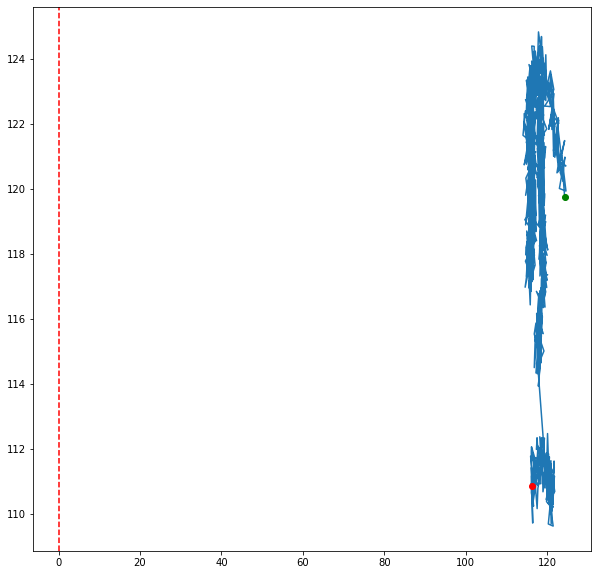

In [34]:
#### Plot predicted trajectory ####
x = test_pre_encoder[:,:,0][0]
y = test_pre_encoder[:,:,1][0]

plt.figure(figsize=(10,10))
plt.plot(x, y)
# plt.title('BugID:{}'.format(BugID))
plt.axvline(x=0, color='red', linestyle='--')
plt.scatter(x[-1], y[-1], c="red", zorder=2)
plt.scatter(x[0], y[0], c="green", zorder=2)
plt.show()

In [ ]:
# x

In [ ]:
plt.figure(figsize=(7,7))
plt.plot(jbG1['x'][idx][:-1], jbG1['y'][idx][:-1], marker=',', label=None, linewidth=1)
plt.title('BugID:{}'.format(BugID))
plt.axvline(x=0, color='red', linestyle='--')
plt.scatter(jbG1['x'][idx][-2], jbG1['y'][idx][-2], c="red")
plt.scatter(jbG1['x'][idx][0], jbG1['y'][idx][0], c="green")

In [ ]:
# x_test_orig=[]
# y_test_orig=[]
# for i in range(len(y_test)):
#     x_test_orig.append(y_test[i][0])
#     y_test_orig.append(y_test[i][0])

In [ ]:
# x_test_orig

In [ ]:
# plt.figure(figsize=(10,10))
# plt.plot(x_test_orig, y_test_orig, marker=',', label=None, linewidth=1)
# plt.show()

In [ ]:
# evaluate model performance

y_pre =  np.sqrt(test_pre_encoder[:,:,0]**2+test_pre_encoder[:,:,1]**2)
y_ture = np.sqrt(y_test[:,:,0]**2+y_test[:,:,1]**2)

In [ ]:
# print(y_pre)
# print(y_ture)

In [ ]:
mae_encoder.append(mae(y_ture,y_pre))
mse_encoder.append(mse(y_ture,y_pre))
rmse_encoder.append(np.sqrt(mse(y_ture,y_pre)))
mape_encoder.append(mape(y_ture,y_pre))
smape_encoder.append(smape(y_ture,y_pre))
r2_encoder.append(r2_score(y_ture,y_pre))

mae_encoder = pd.DataFrame(mae_encoder)
mse_encoder = pd.DataFrame(mse_encoder)
rmse_encoder = pd.DataFrame(rmse_encoder)
mape_encoder = pd.DataFrame(mape_encoder)
smape_encoder = pd.DataFrame(smape_encoder)
r2_encoder = pd.DataFrame(r2_encoder)
evaluate = pd.concat([mae_encoder,mse_encoder,rmse_encoder,mape_encoder,smape_encoder,r2_encoder],axis=1)
# evaluate.to_csv(load_address+"LSTM_encoder_attention_evalute_{0}_{1}.csv".format(n_in_h,n_out_h))
evaluate